In [1]:
from PESSL2 import PESSL
import functions
import os
import numpy as np
import copy

def cos_vec(x1, x2):
    X = x1.reshape([-1])
    Y = x2.reshape([-1])
    
    return np.abs(np.dot(X, Y)) / (np.sqrt(np.dot(X, X)) * np.sqrt(np.dot(Y, Y)))

def cos_mat(X, Y):
    from numpy.linalg import norm
    from numpy.linalg import svd
    
    res1 = norm(np.matmul(X, Y.T), ord = 'fro')
    
    _, res2, _ = svd(X)
    
    _, res3, _ = svd(Y)
    
    res4 = np.sqrt(np.dot(np.square(res2), np.square(res3)))
    
    return res1 / res4

In [1]:
runs = 40
init_N = 5
num_Iter = 100
D = 10

mes = (lambda x, y : cos_vec(x, y))

for i in xrange(runs):
    fun = functions.brainin(D)
    R = PESSL(fun, 2, init_N, 100)
    R_random = PESSL(fun, 2, init_N, 100)
    R_random.data = copy.deepcopy(R.data)
    R_random.fitted_params = copy.deepcopy(R.fitted_params)
    R_random.xlist = copy.deepcopy(R.xlist)
    
    score = []
    
    for j in xrange(num_Iter - init_N):
        #vtrue = fun.W
        vtrue = np.zeros([2, D])
        
        for n in xrange(2):
            vtrue[n, fun.eff_indices[n]] = 1.
            
        v1 = R.fitted_params['mu']
        v2 = R_random.fitted_params['mu']
        
        print 'RUN : ' + str(i + 1) + ' ' + 'ITER : ' + str(j + 1) + ' PESSL : ' + str(cos_mat(vtrue, v1)) + ' RANDOM : ' + str(cos_mat(vtrue, v2))
        
        R.iterate(100)
        R_random.iterate_random()
        
        score.append([cos_mat(vtrue, v1) ,cos_mat(vtrue, v2)])
    
    R.session.close()
    R_random.session.close()
    
    result = {'W' : vtrue,
              'X' : R.data['X'],
              'Y' : R.data['y'],
              'XR' : R_random.data['X'],
              'YR' : R_random.data['y'],
              'S' : np.array(score)}
    
    file_path = "./result_PESSL/brainin10D_" + str(i)
    
    directory = os.path.dirname(file_path)

    if not os.path.exists(directory):
        os.makedirs(directory)

    np.save(file_path, result)

RUN : 1 ITER : 1 PESSL : 0.613158893355 RANDOM : 0.613158893355
RUN : 1 ITER : 2 PESSL : 0.687962826862 RANDOM : 0.384620960644
RUN : 1 ITER : 3 PESSL : 0.327995081712 RANDOM : 0.65899142497
RUN : 1 ITER : 4 PESSL : 0.718463036402 RANDOM : 0.475375727209
RUN : 1 ITER : 5 PESSL : 0.227594382614 RANDOM : 0.332068443909
RUN : 1 ITER : 6 PESSL : 0.407800477402 RANDOM : 0.218989935399
RUN : 1 ITER : 7 PESSL : 0.243696806576 RANDOM : 0.405880667015
RUN : 1 ITER : 8 PESSL : 0.31989461814 RANDOM : 0.470324131615
RUN : 1 ITER : 9 PESSL : 0.341638646734 RANDOM : 0.234887924117
RUN : 1 ITER : 10 PESSL : 0.57794450455 RANDOM : 0.499011275333
RUN : 1 ITER : 11 PESSL : 0.69250792897 RANDOM : 0.378782111594
RUN : 1 ITER : 12 PESSL : 0.671429936482 RANDOM : 0.666306289485
RUN : 1 ITER : 13 PESSL : 0.531308373672 RANDOM : 0.715647939119
RUN : 1 ITER : 14 PESSL : 0.478455414835 RANDOM : 0.694631029462
RUN : 1 ITER : 15 PESSL : 0.717837960321 RANDOM : 0.696584652428
RUN : 1 ITER : 16 PESSL : 0.3989859290

RUN : 2 ITER : 32 PESSL : 0.962659102837 RANDOM : 0.28494555416
RUN : 2 ITER : 33 PESSL : 0.623201855172 RANDOM : 0.517350070137
RUN : 2 ITER : 34 PESSL : 0.656898533602 RANDOM : 0.452886402927
RUN : 2 ITER : 35 PESSL : 0.823154117916 RANDOM : 0.691879218094
RUN : 2 ITER : 36 PESSL : 0.704271073613 RANDOM : 0.703724910243
RUN : 2 ITER : 37 PESSL : 0.813169144687 RANDOM : 0.904586010218
RUN : 2 ITER : 38 PESSL : 0.608480062777 RANDOM : 0.944908351667
RUN : 2 ITER : 39 PESSL : 0.486973071932 RANDOM : 0.57685834885
RUN : 2 ITER : 40 PESSL : 0.76060628433 RANDOM : 0.796442513291
RUN : 2 ITER : 41 PESSL : 0.790221635039 RANDOM : 0.765328696899
RUN : 2 ITER : 42 PESSL : 0.761997381527 RANDOM : 0.716848631304
RUN : 2 ITER : 43 PESSL : 0.760186857845 RANDOM : 0.726958020032
RUN : 2 ITER : 44 PESSL : 0.928496516066 RANDOM : 0.883826929103
RUN : 2 ITER : 45 PESSL : 0.978018996497 RANDOM : 0.742924961389
RUN : 2 ITER : 46 PESSL : 0.872220026307 RANDOM : 0.630085144387
RUN : 2 ITER : 47 PESSL : 0.

RUN : 3 ITER : 62 PESSL : 0.970554807295 RANDOM : 0.968320829757
RUN : 3 ITER : 63 PESSL : 0.911329332614 RANDOM : 0.999965031235
RUN : 3 ITER : 64 PESSL : 0.9925323441 RANDOM : 0.990106414049
RUN : 3 ITER : 65 PESSL : 0.930339838701 RANDOM : 0.951377922124
RUN : 3 ITER : 66 PESSL : 0.99999017357 RANDOM : 0.999560286774
RUN : 3 ITER : 67 PESSL : 0.838910678036 RANDOM : 0.999982174664
RUN : 3 ITER : 68 PESSL : 0.901871648286 RANDOM : 0.847832373938
RUN : 3 ITER : 69 PESSL : 0.897498397569 RANDOM : 0.918005351679
RUN : 3 ITER : 70 PESSL : 0.962201272782 RANDOM : 0.99999523406
RUN : 3 ITER : 71 PESSL : 0.954235451739 RANDOM : 0.999529092296
RUN : 3 ITER : 72 PESSL : 0.998978230789 RANDOM : 0.999990632438
RUN : 3 ITER : 73 PESSL : 0.880171853138 RANDOM : 0.999683870134
RUN : 3 ITER : 74 PESSL : 0.983774249943 RANDOM : 0.675561118677
RUN : 3 ITER : 75 PESSL : 0.999999073222 RANDOM : 0.983885009685
RUN : 3 ITER : 76 PESSL : 0.7281682603 RANDOM : 0.896056344621
RUN : 3 ITER : 77 PESSL : 0.702

RUN : 4 ITER : 90 PESSL : 0.999992702403 RANDOM : 0.999999182081
RUN : 4 ITER : 91 PESSL : 0.833348537056 RANDOM : 0.999994347234
RUN : 4 ITER : 92 PESSL : 0.999996390334 RANDOM : 0.999999828107
RUN : 4 ITER : 93 PESSL : 0.991772739961 RANDOM : 0.999999853025
RUN : 4 ITER : 94 PESSL : 0.999994418016 RANDOM : 0.999999812238
RUN : 4 ITER : 95 PESSL : 0.999983768621 RANDOM : 0.999999800148
RUN : 5 ITER : 1 PESSL : 0.231710589514 RANDOM : 0.231710589514
RUN : 5 ITER : 2 PESSL : 0.528722359509 RANDOM : 0.527717037199
RUN : 5 ITER : 3 PESSL : 0.192655929013 RANDOM : 0.585200336328
RUN : 5 ITER : 4 PESSL : 0.367154049357 RANDOM : 0.591122918793
RUN : 5 ITER : 5 PESSL : 0.450404572062 RANDOM : 0.631508251808
RUN : 5 ITER : 6 PESSL : 0.20810326796 RANDOM : 0.552442374378
RUN : 5 ITER : 7 PESSL : 0.486380567744 RANDOM : 0.740280851251
RUN : 5 ITER : 8 PESSL : 0.617584614328 RANDOM : 0.7374467254
RUN : 5 ITER : 9 PESSL : 0.30479039145 RANDOM : 0.426181701753
RUN : 5 ITER : 10 PESSL : 0.7507569155

RUN : 5 ITER : 90 PESSL : 0.999999866156 RANDOM : 0.999999819619
RUN : 5 ITER : 91 PESSL : 0.999999858333 RANDOM : 0.99990020164
RUN : 5 ITER : 92 PESSL : 0.999999760574 RANDOM : 0.999993065475
RUN : 5 ITER : 93 PESSL : 0.999990433076 RANDOM : 0.999995897391
RUN : 5 ITER : 94 PESSL : 0.999998461235 RANDOM : 0.999998054569
RUN : 5 ITER : 95 PESSL : 0.999999974101 RANDOM : 0.999998397846
RUN : 6 ITER : 1 PESSL : 0.651480879019 RANDOM : 0.651480879019
RUN : 6 ITER : 2 PESSL : 0.61639824217 RANDOM : 0.404154527741
RUN : 6 ITER : 3 PESSL : 0.573550364954 RANDOM : 0.58702157442
RUN : 6 ITER : 4 PESSL : 0.312819423803 RANDOM : 0.408878813627
RUN : 6 ITER : 5 PESSL : 0.725085857133 RANDOM : 0.518069211994
RUN : 6 ITER : 6 PESSL : 0.667698988217 RANDOM : 0.642386921019
RUN : 6 ITER : 7 PESSL : 0.471482279041 RANDOM : 0.592774169891
RUN : 6 ITER : 8 PESSL : 0.28552551544 RANDOM : 0.507667208005
RUN : 6 ITER : 9 PESSL : 0.19098514267 RANDOM : 0.43451192998
RUN : 6 ITER : 10 PESSL : 0.262071313408

RUN : 6 ITER : 91 PESSL : 0.999996266272 RANDOM : 0.999194075095
RUN : 6 ITER : 92 PESSL : 0.999973537933 RANDOM : 0.965553834243
RUN : 6 ITER : 93 PESSL : 0.999996889179 RANDOM : 0.993689116797
RUN : 6 ITER : 94 PESSL : 0.999999516942 RANDOM : 0.995763214856
RUN : 6 ITER : 95 PESSL : 0.999998643545 RANDOM : 0.999417721909
RUN : 7 ITER : 1 PESSL : 0.380725553999 RANDOM : 0.380725553999
RUN : 7 ITER : 2 PESSL : 0.507013593348 RANDOM : 0.308504688362
RUN : 7 ITER : 3 PESSL : 0.596830138674 RANDOM : 0.532854214675
RUN : 7 ITER : 4 PESSL : 0.36839328964 RANDOM : 0.460621414882
RUN : 7 ITER : 5 PESSL : 0.593284930027 RANDOM : 0.620936562471
RUN : 7 ITER : 6 PESSL : 0.77174409632 RANDOM : 0.556396333591
RUN : 7 ITER : 7 PESSL : 0.736341481129 RANDOM : 0.635421118998
RUN : 7 ITER : 8 PESSL : 0.722019415459 RANDOM : 0.554402593477
RUN : 7 ITER : 9 PESSL : 0.71819141643 RANDOM : 0.565085416647
RUN : 7 ITER : 10 PESSL : 0.474447546843 RANDOM : 0.780613630065
RUN : 7 ITER : 11 PESSL : 0.411721662

RUN : 8 ITER : 12 PESSL : 0.667356009742 RANDOM : 0.646270652171
RUN : 8 ITER : 13 PESSL : 0.699657462885 RANDOM : 0.525312768109
RUN : 8 ITER : 14 PESSL : 0.712562025461 RANDOM : 0.86206555604
RUN : 8 ITER : 15 PESSL : 0.592078458469 RANDOM : 0.670269979159
RUN : 8 ITER : 16 PESSL : 0.622338106758 RANDOM : 0.8252331687
RUN : 8 ITER : 17 PESSL : 0.378250800275 RANDOM : 0.86913925364
RUN : 8 ITER : 18 PESSL : 0.449823097692 RANDOM : 0.925755641882
RUN : 8 ITER : 19 PESSL : 0.383784508608 RANDOM : 0.923219650457
RUN : 8 ITER : 20 PESSL : 0.405370145933 RANDOM : 0.932562436905
RUN : 8 ITER : 21 PESSL : 0.209721575453 RANDOM : 0.866848054097
RUN : 8 ITER : 22 PESSL : 0.175554090415 RANDOM : 0.831330706607
RUN : 8 ITER : 23 PESSL : 0.335674296396 RANDOM : 0.835829308499
RUN : 8 ITER : 24 PESSL : 0.330353127935 RANDOM : 0.853341673862
RUN : 8 ITER : 25 PESSL : 0.336270028813 RANDOM : 0.891274729812
RUN : 8 ITER : 26 PESSL : 0.421181094198 RANDOM : 0.78561096556
RUN : 8 ITER : 27 PESSL : 0.43

RUN : 8 ITER : 91 PESSL : 0.999999784482 RANDOM : 0.806215823061
RUN : 8 ITER : 92 PESSL : 0.999999835391 RANDOM : 0.795405576131
RUN : 8 ITER : 93 PESSL : 0.999999947721 RANDOM : 0.568048766792
RUN : 8 ITER : 94 PESSL : 0.999999481221 RANDOM : 0.782924825187
RUN : 8 ITER : 95 PESSL : 0.999999841273 RANDOM : 0.999993269423
RUN : 9 ITER : 1 PESSL : 0.616265533372 RANDOM : 0.616265533372
RUN : 9 ITER : 2 PESSL : 0.61858775304 RANDOM : 0.659998238283
RUN : 9 ITER : 3 PESSL : 0.556617763964 RANDOM : 0.681106516972
RUN : 9 ITER : 4 PESSL : 0.782302806429 RANDOM : 0.618563108597
RUN : 9 ITER : 5 PESSL : 0.805714992802 RANDOM : 0.495937766738
RUN : 9 ITER : 6 PESSL : 0.383193195642 RANDOM : 0.460946514708
RUN : 9 ITER : 7 PESSL : 0.254615651266 RANDOM : 0.482502513565
RUN : 9 ITER : 8 PESSL : 0.410725683691 RANDOM : 0.767777290291
RUN : 9 ITER : 9 PESSL : 0.484889600801 RANDOM : 0.883933971734
RUN : 9 ITER : 10 PESSL : 0.341910604386 RANDOM : 0.866188801691
RUN : 9 ITER : 11 PESSL : 0.2626816

RUN : 10 ITER : 11 PESSL : 0.411252254039 RANDOM : 0.539277447983
RUN : 10 ITER : 12 PESSL : 0.496739668195 RANDOM : 0.727781011602
RUN : 10 ITER : 13 PESSL : 0.474096988364 RANDOM : 0.772098354109
RUN : 10 ITER : 14 PESSL : 0.484981078236 RANDOM : 0.672918134397
RUN : 10 ITER : 15 PESSL : 0.1697724344 RANDOM : 0.827377375623
RUN : 10 ITER : 16 PESSL : 0.778995920416 RANDOM : 0.800515082946
RUN : 10 ITER : 17 PESSL : 0.713326858506 RANDOM : 0.744344826925
RUN : 10 ITER : 18 PESSL : 0.508393737997 RANDOM : 0.782386757072
RUN : 10 ITER : 19 PESSL : 0.424818126145 RANDOM : 0.801957382804
RUN : 10 ITER : 20 PESSL : 0.834692080333 RANDOM : 0.836686938691
RUN : 10 ITER : 21 PESSL : 0.776906784243 RANDOM : 0.896462754954
RUN : 10 ITER : 22 PESSL : 0.882943450959 RANDOM : 0.707336127117
RUN : 10 ITER : 23 PESSL : 0.734050563481 RANDOM : 0.801889414549
RUN : 10 ITER : 24 PESSL : 0.698954143796 RANDOM : 0.754470906792
RUN : 10 ITER : 25 PESSL : 0.824613516609 RANDOM : 0.77196832578
RUN : 10 ITER

RUN : 11 ITER : 2 PESSL : 0.519520872962 RANDOM : 0.212039868289
RUN : 11 ITER : 3 PESSL : 0.54072119178 RANDOM : 0.132762605041
RUN : 11 ITER : 4 PESSL : 0.405972190944 RANDOM : 0.234671410264
RUN : 11 ITER : 5 PESSL : 0.478949381734 RANDOM : 0.364482745874
RUN : 11 ITER : 6 PESSL : 0.220149870733 RANDOM : 0.500701506902
RUN : 11 ITER : 7 PESSL : 0.14926517001 RANDOM : 0.614569951913
RUN : 11 ITER : 8 PESSL : 0.255556186539 RANDOM : 0.639471327038
RUN : 11 ITER : 9 PESSL : 0.123167112424 RANDOM : 0.656845424475
RUN : 11 ITER : 10 PESSL : 0.292277480177 RANDOM : 0.893258283886
RUN : 11 ITER : 11 PESSL : 0.289220925489 RANDOM : 0.820123912053
RUN : 11 ITER : 12 PESSL : 0.478872762177 RANDOM : 0.736709706088
RUN : 11 ITER : 13 PESSL : 0.484541138867 RANDOM : 0.778999272861
RUN : 11 ITER : 14 PESSL : 0.303354518029 RANDOM : 0.80837661567
RUN : 11 ITER : 15 PESSL : 0.437563531054 RANDOM : 0.798342968635
RUN : 11 ITER : 16 PESSL : 0.499978350579 RANDOM : 0.694489822128
RUN : 11 ITER : 17 PE

RUN : 12 ITER : 16 PESSL : 0.546999917572 RANDOM : 0.579986141114
RUN : 12 ITER : 17 PESSL : 0.504498657294 RANDOM : 0.643742621206
RUN : 12 ITER : 18 PESSL : 0.684237889822 RANDOM : 0.793662730363
RUN : 12 ITER : 19 PESSL : 0.808393662897 RANDOM : 0.369022899152
RUN : 12 ITER : 20 PESSL : 0.767993332918 RANDOM : 0.546247814299
RUN : 12 ITER : 21 PESSL : 0.819211705668 RANDOM : 0.70033238728
RUN : 12 ITER : 22 PESSL : 0.77246282056 RANDOM : 0.655986507876
RUN : 12 ITER : 23 PESSL : 0.906684311875 RANDOM : 0.679806790381
RUN : 12 ITER : 24 PESSL : 0.881212553155 RANDOM : 0.71753262872
RUN : 12 ITER : 25 PESSL : 0.908805419455 RANDOM : 0.798334650474
RUN : 12 ITER : 26 PESSL : 0.757779944403 RANDOM : 0.837502579472
RUN : 12 ITER : 27 PESSL : 0.837291555344 RANDOM : 0.777773010983
RUN : 12 ITER : 28 PESSL : 0.837790035147 RANDOM : 0.644894464176
RUN : 12 ITER : 29 PESSL : 0.945335970721 RANDOM : 0.762260918103
RUN : 12 ITER : 30 PESSL : 0.78566581397 RANDOM : 0.847174260344
RUN : 12 ITER 

RUN : 12 ITER : 91 PESSL : 0.999991150612 RANDOM : 0.839962996195
RUN : 12 ITER : 92 PESSL : 0.999999541963 RANDOM : 0.898609405212
RUN : 12 ITER : 93 PESSL : 0.999999911525 RANDOM : 0.674483071584
RUN : 12 ITER : 94 PESSL : 0.999095758698 RANDOM : 0.969018759858
RUN : 12 ITER : 95 PESSL : 0.999262484016 RANDOM : 0.78053855887
RUN : 13 ITER : 1 PESSL : 0.417961872018 RANDOM : 0.417961872018
RUN : 13 ITER : 2 PESSL : 0.351335928492 RANDOM : 0.577512694056
RUN : 13 ITER : 3 PESSL : 0.585208489705 RANDOM : 0.389928362159
RUN : 13 ITER : 4 PESSL : 0.762144944421 RANDOM : 0.315761419145
RUN : 13 ITER : 5 PESSL : 0.692342948839 RANDOM : 0.275043014978
RUN : 13 ITER : 6 PESSL : 0.305595473886 RANDOM : 0.367848746072
RUN : 13 ITER : 7 PESSL : 0.499155782754 RANDOM : 0.339310216764
RUN : 13 ITER : 8 PESSL : 0.498175488615 RANDOM : 0.477858647164
RUN : 13 ITER : 9 PESSL : 0.465287039924 RANDOM : 0.764784133514
RUN : 13 ITER : 10 PESSL : 0.519759476668 RANDOM : 0.675827662391
RUN : 13 ITER : 11 P

RUN : 14 ITER : 10 PESSL : 0.391533061821 RANDOM : 0.831402723864
RUN : 14 ITER : 11 PESSL : 0.454310596599 RANDOM : 0.838473519769
RUN : 14 ITER : 12 PESSL : 0.437168313715 RANDOM : 0.921369700574
RUN : 14 ITER : 13 PESSL : 0.354450990732 RANDOM : 0.931891339429
RUN : 14 ITER : 14 PESSL : 0.57292486492 RANDOM : 0.89038101675
RUN : 14 ITER : 15 PESSL : 0.452670832825 RANDOM : 0.883622835077
RUN : 14 ITER : 16 PESSL : 0.488567653916 RANDOM : 0.911648352467
RUN : 14 ITER : 17 PESSL : 0.631421605848 RANDOM : 0.918848377365
RUN : 14 ITER : 18 PESSL : 0.848021765182 RANDOM : 0.880630684124
RUN : 14 ITER : 19 PESSL : 0.769398701058 RANDOM : 0.883245685198
RUN : 14 ITER : 20 PESSL : 0.747746613155 RANDOM : 0.898912444755
RUN : 14 ITER : 21 PESSL : 0.843802465298 RANDOM : 0.805759546429
RUN : 14 ITER : 22 PESSL : 0.897659198595 RANDOM : 0.869291024365
RUN : 14 ITER : 23 PESSL : 0.837237383266 RANDOM : 0.821994378751
RUN : 14 ITER : 24 PESSL : 0.922481762925 RANDOM : 0.851240655544
RUN : 14 ITE

RUN : 15 ITER : 40 PESSL : 0.752347601736 RANDOM : 0.81969942182
RUN : 15 ITER : 41 PESSL : 0.676465075582 RANDOM : 0.939068631032
RUN : 15 ITER : 42 PESSL : 0.831428437231 RANDOM : 0.850113003367
RUN : 15 ITER : 43 PESSL : 0.835353256786 RANDOM : 0.832010960478
RUN : 15 ITER : 44 PESSL : 0.956729114676 RANDOM : 0.786120434248
RUN : 15 ITER : 45 PESSL : 0.861430936454 RANDOM : 0.875417571823
RUN : 15 ITER : 46 PESSL : 0.915557576056 RANDOM : 0.979319234284
RUN : 15 ITER : 47 PESSL : 0.827682178401 RANDOM : 0.766741127958
RUN : 15 ITER : 48 PESSL : 0.843942882535 RANDOM : 0.93566347832
RUN : 15 ITER : 49 PESSL : 0.281626002487 RANDOM : 0.839209450051
RUN : 15 ITER : 50 PESSL : 0.257328438232 RANDOM : 0.841761401821
RUN : 15 ITER : 51 PESSL : 0.34942869941 RANDOM : 0.673362655093
RUN : 15 ITER : 52 PESSL : 0.31773288418 RANDOM : 0.934589670907
RUN : 15 ITER : 53 PESSL : 0.370027720452 RANDOM : 0.764449087872
RUN : 15 ITER : 54 PESSL : 0.234132060293 RANDOM : 0.861216471984
RUN : 15 ITER 

RUN : 16 ITER : 54 PESSL : 0.971458443728 RANDOM : 0.99939986204
RUN : 16 ITER : 55 PESSL : 0.999944107323 RANDOM : 0.999955734672
RUN : 16 ITER : 56 PESSL : 0.723416530024 RANDOM : 0.999913162915
RUN : 16 ITER : 57 PESSL : 0.676650094155 RANDOM : 0.999986668512
RUN : 16 ITER : 58 PESSL : 0.732044685239 RANDOM : 0.999991308831
RUN : 16 ITER : 59 PESSL : 0.830022423622 RANDOM : 0.999985231293
RUN : 16 ITER : 60 PESSL : 0.991601800147 RANDOM : 0.999991266035
RUN : 16 ITER : 61 PESSL : 0.99215808979 RANDOM : 0.999959241091
RUN : 16 ITER : 62 PESSL : 0.890801872304 RANDOM : 0.995744517167
RUN : 16 ITER : 63 PESSL : 0.976733811418 RANDOM : 0.999990528857
RUN : 16 ITER : 64 PESSL : 0.976985699918 RANDOM : 0.99990718395
RUN : 16 ITER : 65 PESSL : 0.963086588485 RANDOM : 0.999917987646
RUN : 16 ITER : 66 PESSL : 0.95159923398 RANDOM : 0.999995968619
RUN : 16 ITER : 67 PESSL : 0.955454602601 RANDOM : 0.999983296096
RUN : 16 ITER : 68 PESSL : 0.989150549033 RANDOM : 0.999995651973
RUN : 16 ITER 

RUN : 16 ITER : 95 PESSL : 0.999999456484 RANDOM : 0.99999904417
RUN : 17 ITER : 1 PESSL : 0.209888489745 RANDOM : 0.209888489745
RUN : 17 ITER : 2 PESSL : 0.369913546394 RANDOM : 0.533974799185
RUN : 17 ITER : 3 PESSL : 0.649905439071 RANDOM : 0.401768345853
RUN : 17 ITER : 4 PESSL : 0.184450185176 RANDOM : 0.365747186335
RUN : 17 ITER : 5 PESSL : 0.543842887153 RANDOM : 0.488747881072
RUN : 17 ITER : 6 PESSL : 0.598196280394 RANDOM : 0.57543591702
RUN : 17 ITER : 7 PESSL : 0.520664720378 RANDOM : 0.686008784183
RUN : 17 ITER : 8 PESSL : 0.398365662142 RANDOM : 0.450384956182
RUN : 17 ITER : 9 PESSL : 0.4433079 RANDOM : 0.602681477298
RUN : 17 ITER : 10 PESSL : 0.463286299772 RANDOM : 0.415886169471
RUN : 17 ITER : 11 PESSL : 0.423708653295 RANDOM : 0.484880216082
RUN : 17 ITER : 12 PESSL : 0.556803933476 RANDOM : 0.57269747553
RUN : 17 ITER : 13 PESSL : 0.321295940605 RANDOM : 0.621919285529
RUN : 17 ITER : 14 PESSL : 0.202743622631 RANDOM : 0.504187125535
RUN : 17 ITER : 15 PESSL : 

RUN : 17 ITER : 92 PESSL : 0.999999815293 RANDOM : 0.992392793564
RUN : 17 ITER : 93 PESSL : 0.99999962577 RANDOM : 0.99887355132
RUN : 17 ITER : 94 PESSL : 0.999999180246 RANDOM : 0.931238466575
RUN : 17 ITER : 95 PESSL : 0.999997555498 RANDOM : 0.81925111606
RUN : 18 ITER : 1 PESSL : 0.46786152048 RANDOM : 0.46786152048
RUN : 18 ITER : 2 PESSL : 0.534400591599 RANDOM : 0.455482399375
RUN : 18 ITER : 3 PESSL : 0.514048019115 RANDOM : 0.46574805951
RUN : 18 ITER : 4 PESSL : 0.46660768563 RANDOM : 0.683599672735
RUN : 18 ITER : 5 PESSL : 0.592842128535 RANDOM : 0.520706627316
RUN : 18 ITER : 6 PESSL : 0.635748456832 RANDOM : 0.394923550805
RUN : 18 ITER : 7 PESSL : 0.68070223763 RANDOM : 0.467379260737
RUN : 18 ITER : 8 PESSL : 0.642018097484 RANDOM : 0.583503245164
RUN : 18 ITER : 9 PESSL : 0.75806517111 RANDOM : 0.360952491042
RUN : 18 ITER : 10 PESSL : 0.875512321836 RANDOM : 0.234610995706
RUN : 18 ITER : 11 PESSL : 0.707919365339 RANDOM : 0.620135371962
RUN : 18 ITER : 12 PESSL : 0

RUN : 19 ITER : 11 PESSL : 0.406971590364 RANDOM : 0.852092139223
RUN : 19 ITER : 12 PESSL : 0.465011257656 RANDOM : 0.885271447732
RUN : 19 ITER : 13 PESSL : 0.463900528423 RANDOM : 0.857152332708
RUN : 19 ITER : 14 PESSL : 0.336274295289 RANDOM : 0.930865762404
RUN : 19 ITER : 15 PESSL : 0.532229814713 RANDOM : 0.930549227331
RUN : 19 ITER : 16 PESSL : 0.560064693759 RANDOM : 0.851315676256
RUN : 19 ITER : 17 PESSL : 0.657093083561 RANDOM : 0.9359741825
RUN : 19 ITER : 18 PESSL : 0.825774854379 RANDOM : 0.943737130194
RUN : 19 ITER : 19 PESSL : 0.870241008096 RANDOM : 0.861130203926
RUN : 19 ITER : 20 PESSL : 0.846735993611 RANDOM : 0.892665401046
RUN : 19 ITER : 21 PESSL : 0.943995699779 RANDOM : 0.8290664881
RUN : 19 ITER : 22 PESSL : 0.912090021333 RANDOM : 0.901243320614
RUN : 19 ITER : 23 PESSL : 0.66647659326 RANDOM : 0.828346293707
RUN : 19 ITER : 24 PESSL : 0.603956893806 RANDOM : 0.814570364396
RUN : 19 ITER : 25 PESSL : 0.692573855717 RANDOM : 0.907441214463
RUN : 19 ITER :

RUN : 20 ITER : 41 PESSL : 0.897919791141 RANDOM : 0.748053325201
RUN : 20 ITER : 42 PESSL : 0.661419281075 RANDOM : 0.759886255055
RUN : 20 ITER : 43 PESSL : 0.757932187843 RANDOM : 0.749508694921
RUN : 20 ITER : 44 PESSL : 0.775034815679 RANDOM : 0.736005165003
RUN : 20 ITER : 45 PESSL : 0.878154804573 RANDOM : 0.620049009578
RUN : 20 ITER : 46 PESSL : 0.564146790834 RANDOM : 0.649566623635
RUN : 20 ITER : 47 PESSL : 0.755763859582 RANDOM : 0.731074899837
RUN : 20 ITER : 48 PESSL : 0.886762847764 RANDOM : 0.663393006945
RUN : 20 ITER : 49 PESSL : 0.693412234714 RANDOM : 0.703868637512
RUN : 20 ITER : 50 PESSL : 0.910448519013 RANDOM : 0.612743904412
RUN : 20 ITER : 51 PESSL : 0.682559619924 RANDOM : 0.782656495517
RUN : 20 ITER : 52 PESSL : 0.874546903837 RANDOM : 0.655693633741
RUN : 20 ITER : 53 PESSL : 0.829726332753 RANDOM : 0.707370321212
RUN : 20 ITER : 54 PESSL : 0.813891433732 RANDOM : 0.814234889336
RUN : 20 ITER : 55 PESSL : 0.846290305045 RANDOM : 0.701602809411
RUN : 20 I

RUN : 21 ITER : 71 PESSL : 0.993270545401 RANDOM : 0.824665387912
RUN : 21 ITER : 72 PESSL : 0.999990080911 RANDOM : 0.74008179935
RUN : 21 ITER : 73 PESSL : 0.99999121978 RANDOM : 0.772027697724
RUN : 21 ITER : 74 PESSL : 0.999974703651 RANDOM : 0.999839754151
RUN : 21 ITER : 75 PESSL : 0.999978038008 RANDOM : 0.727798653969
RUN : 21 ITER : 76 PESSL : 0.99993938642 RANDOM : 0.999998932722
RUN : 21 ITER : 77 PESSL : 0.999166336812 RANDOM : 0.999674829635
RUN : 21 ITER : 78 PESSL : 0.936618417765 RANDOM : 0.99999928642
RUN : 21 ITER : 79 PESSL : 0.999995691667 RANDOM : 0.999997384232
RUN : 21 ITER : 80 PESSL : 0.988480987685 RANDOM : 0.999996260405
RUN : 21 ITER : 81 PESSL : 0.999997191653 RANDOM : 0.999996822452
RUN : 21 ITER : 82 PESSL : 0.986262353597 RANDOM : 0.999993731744
RUN : 21 ITER : 83 PESSL : 0.999998563293 RANDOM : 0.999979763946
RUN : 21 ITER : 84 PESSL : 0.994781465698 RANDOM : 0.999979639047
RUN : 21 ITER : 85 PESSL : 0.999999466401 RANDOM : 0.999993433993
RUN : 21 ITER 

RUN : 22 ITER : 35 PESSL : 0.717541054564 RANDOM : 0.842478661644
RUN : 22 ITER : 36 PESSL : 0.711274304972 RANDOM : 0.749510328936
RUN : 22 ITER : 37 PESSL : 0.792984238104 RANDOM : 0.699942326574
RUN : 22 ITER : 38 PESSL : 0.83497880128 RANDOM : 0.744529193938
RUN : 22 ITER : 39 PESSL : 0.899845744714 RANDOM : 0.84656708361
RUN : 22 ITER : 40 PESSL : 0.812770088298 RANDOM : 0.820758664432
RUN : 22 ITER : 41 PESSL : 0.744358606394 RANDOM : 0.848970555699
RUN : 22 ITER : 42 PESSL : 0.615805255976 RANDOM : 0.847289051295
RUN : 22 ITER : 43 PESSL : 0.752234017881 RANDOM : 0.848126951617
RUN : 22 ITER : 44 PESSL : 0.672185950021 RANDOM : 0.913043959731
RUN : 22 ITER : 45 PESSL : 0.600265222897 RANDOM : 0.857347801764
RUN : 22 ITER : 46 PESSL : 0.785073675435 RANDOM : 0.867863739701
RUN : 22 ITER : 47 PESSL : 0.843555076132 RANDOM : 0.917939815534
RUN : 22 ITER : 48 PESSL : 0.910178143161 RANDOM : 0.790156630628
RUN : 22 ITER : 49 PESSL : 0.620954619316 RANDOM : 0.827775553694
RUN : 22 ITE

RUN : 23 ITER : 49 PESSL : 0.973761030843 RANDOM : 0.999785613064
RUN : 23 ITER : 50 PESSL : 0.984478973023 RANDOM : 0.996868411054
RUN : 23 ITER : 51 PESSL : 0.986742975016 RANDOM : 0.972651786839
RUN : 23 ITER : 52 PESSL : 0.958119601158 RANDOM : 0.992444752991
RUN : 23 ITER : 53 PESSL : 0.984335350873 RANDOM : 0.999932261587
RUN : 23 ITER : 54 PESSL : 0.990655006719 RANDOM : 0.999971518439
RUN : 23 ITER : 55 PESSL : 0.945515315964 RANDOM : 0.999662302178
RUN : 23 ITER : 56 PESSL : 0.958145220141 RANDOM : 0.999956378788
RUN : 23 ITER : 57 PESSL : 0.933583718568 RANDOM : 0.999730867517
RUN : 23 ITER : 58 PESSL : 0.967955474255 RANDOM : 0.999900918882
RUN : 23 ITER : 59 PESSL : 0.981776430296 RANDOM : 0.999808670382
RUN : 23 ITER : 60 PESSL : 0.954321873453 RANDOM : 0.99998449049
RUN : 23 ITER : 61 PESSL : 0.981895790806 RANDOM : 0.99999322347
RUN : 23 ITER : 62 PESSL : 0.990595922345 RANDOM : 0.999915222761
RUN : 23 ITER : 63 PESSL : 0.985194569335 RANDOM : 0.999412044049
RUN : 23 ITE

RUN : 24 ITER : 30 PESSL : 0.50914978518 RANDOM : 0.650823245788
RUN : 24 ITER : 31 PESSL : 0.458593183719 RANDOM : 0.738219615684
RUN : 24 ITER : 32 PESSL : 0.300529940169 RANDOM : 0.848326329156
RUN : 24 ITER : 33 PESSL : 0.475312516007 RANDOM : 0.826191261147
RUN : 24 ITER : 34 PESSL : 0.680548627772 RANDOM : 0.830316821746
RUN : 24 ITER : 35 PESSL : 0.418980102627 RANDOM : 0.845324681262
RUN : 24 ITER : 36 PESSL : 0.645419959933 RANDOM : 0.809354683997
RUN : 24 ITER : 37 PESSL : 0.587459715005 RANDOM : 0.809389870396
RUN : 24 ITER : 38 PESSL : 0.607266838924 RANDOM : 0.804685761715
RUN : 24 ITER : 39 PESSL : 0.457936004004 RANDOM : 0.84004333515
RUN : 24 ITER : 40 PESSL : 0.844618188136 RANDOM : 0.706929617237
RUN : 24 ITER : 41 PESSL : 0.525925441503 RANDOM : 0.958934939029
RUN : 24 ITER : 42 PESSL : 0.763097062397 RANDOM : 0.928486144508
RUN : 24 ITER : 43 PESSL : 0.883043496541 RANDOM : 0.703754193162
RUN : 24 ITER : 44 PESSL : 0.717621700716 RANDOM : 0.92063939454
RUN : 24 ITER

RUN : 24 ITER : 93 PESSL : 0.999997926569 RANDOM : 0.920520277452
RUN : 24 ITER : 94 PESSL : 0.999999847231 RANDOM : 0.920795188125
RUN : 24 ITER : 95 PESSL : 0.999999583899 RANDOM : 0.999997885857
RUN : 25 ITER : 1 PESSL : 0.625348064034 RANDOM : 0.625348064034
RUN : 25 ITER : 2 PESSL : 0.634258894448 RANDOM : 0.590662440575
RUN : 25 ITER : 3 PESSL : 0.703104872421 RANDOM : 0.595571871146
RUN : 25 ITER : 4 PESSL : 0.63601674783 RANDOM : 0.456435117688
RUN : 25 ITER : 5 PESSL : 0.40447323813 RANDOM : 0.570234314798
RUN : 25 ITER : 6 PESSL : 0.735674308257 RANDOM : 0.396190700312
RUN : 25 ITER : 7 PESSL : 0.709535832187 RANDOM : 0.517940925708
RUN : 25 ITER : 8 PESSL : 0.803390281716 RANDOM : 0.374584120099
RUN : 25 ITER : 9 PESSL : 0.604272497655 RANDOM : 0.387396437537
RUN : 25 ITER : 10 PESSL : 0.5068714127 RANDOM : 0.473699673436
RUN : 25 ITER : 11 PESSL : 0.586617065524 RANDOM : 0.360732804316
RUN : 25 ITER : 12 PESSL : 0.380159148696 RANDOM : 0.499514481903
RUN : 25 ITER : 13 PESS

RUN : 26 ITER : 2 PESSL : 0.40929846957 RANDOM : 0.366220980455
RUN : 26 ITER : 3 PESSL : 0.394246223673 RANDOM : 0.457078890586
RUN : 26 ITER : 4 PESSL : 0.304716216074 RANDOM : 0.400725719531
RUN : 26 ITER : 5 PESSL : 0.165569909371 RANDOM : 0.51085770409
RUN : 26 ITER : 6 PESSL : 0.265557590254 RANDOM : 0.549456945671
RUN : 26 ITER : 7 PESSL : 0.440967511928 RANDOM : 0.695647035449
RUN : 26 ITER : 8 PESSL : 0.429523037468 RANDOM : 0.589145305958
RUN : 26 ITER : 9 PESSL : 0.444930601827 RANDOM : 0.56235403296
RUN : 26 ITER : 10 PESSL : 0.438845816503 RANDOM : 0.687561176961
RUN : 26 ITER : 11 PESSL : 0.422428636058 RANDOM : 0.724935098054
RUN : 26 ITER : 12 PESSL : 0.306705383499 RANDOM : 0.686585009025
RUN : 26 ITER : 13 PESSL : 0.318829327266 RANDOM : 0.582595667911
RUN : 26 ITER : 14 PESSL : 0.520010119348 RANDOM : 0.728627121814
RUN : 26 ITER : 15 PESSL : 0.612259381682 RANDOM : 0.788971671367
RUN : 26 ITER : 16 PESSL : 0.339000188165 RANDOM : 0.837643280268
RUN : 26 ITER : 17 PE

RUN : 26 ITER : 88 PESSL : 0.655481821858 RANDOM : 0.999999468509
RUN : 26 ITER : 89 PESSL : 0.688710834008 RANDOM : 0.999998897224
RUN : 26 ITER : 90 PESSL : 0.800933175612 RANDOM : 0.999992181929
RUN : 26 ITER : 91 PESSL : 0.834990990406 RANDOM : 0.999899220241
RUN : 26 ITER : 92 PESSL : 0.881734395493 RANDOM : 0.999849536204
RUN : 26 ITER : 93 PESSL : 0.998847062904 RANDOM : 0.999983921111
RUN : 26 ITER : 94 PESSL : 0.992750984421 RANDOM : 0.999998804714
RUN : 26 ITER : 95 PESSL : 0.999999259993 RANDOM : 0.999989406373
RUN : 27 ITER : 1 PESSL : 0.737434655388 RANDOM : 0.737434655388
RUN : 27 ITER : 2 PESSL : 0.5942624189 RANDOM : 0.771415420852
RUN : 27 ITER : 3 PESSL : 0.523273063341 RANDOM : 0.695612740304
RUN : 27 ITER : 4 PESSL : 0.577146738643 RANDOM : 0.466518028072
RUN : 27 ITER : 5 PESSL : 0.743011645332 RANDOM : 0.715922364233
RUN : 27 ITER : 6 PESSL : 0.841307475331 RANDOM : 0.594629116986
RUN : 27 ITER : 7 PESSL : 0.40818969757 RANDOM : 0.468948370171
RUN : 27 ITER : 8 PE

RUN : 28 ITER : 5 PESSL : 0.236424868327 RANDOM : 0.51689351379
RUN : 28 ITER : 6 PESSL : 0.347721333138 RANDOM : 0.556202668617
RUN : 28 ITER : 7 PESSL : 0.341273263534 RANDOM : 0.569814638642
RUN : 28 ITER : 8 PESSL : 0.490546905659 RANDOM : 0.535809488394
RUN : 28 ITER : 9 PESSL : 0.510859328958 RANDOM : 0.44278077677
RUN : 28 ITER : 10 PESSL : 0.378040975849 RANDOM : 0.591150816772
RUN : 28 ITER : 11 PESSL : 0.237110499672 RANDOM : 0.551933984584
RUN : 28 ITER : 12 PESSL : 0.49311950745 RANDOM : 0.430828298609
RUN : 28 ITER : 13 PESSL : 0.587625228162 RANDOM : 0.466014445097
RUN : 28 ITER : 14 PESSL : 0.779632495396 RANDOM : 0.428038627206
RUN : 28 ITER : 15 PESSL : 0.666378108345 RANDOM : 0.554655918864
RUN : 28 ITER : 16 PESSL : 0.717001728462 RANDOM : 0.494675308785
RUN : 28 ITER : 17 PESSL : 0.670165178585 RANDOM : 0.647564877655
RUN : 28 ITER : 18 PESSL : 0.654559112563 RANDOM : 0.495259167537
RUN : 28 ITER : 19 PESSL : 0.791598908894 RANDOM : 0.620719597893
RUN : 28 ITER : 20

RUN : 29 ITER : 1 PESSL : 0.527932036466 RANDOM : 0.527932036466
RUN : 29 ITER : 2 PESSL : 0.418843785643 RANDOM : 0.476546379127
RUN : 29 ITER : 3 PESSL : 0.55094948667 RANDOM : 0.179273847035
RUN : 29 ITER : 4 PESSL : 0.520296026027 RANDOM : 0.310225191676
RUN : 29 ITER : 5 PESSL : 0.563539477167 RANDOM : 0.682403170887
RUN : 29 ITER : 6 PESSL : 0.456338419287 RANDOM : 0.620720304819
RUN : 29 ITER : 7 PESSL : 0.645848557236 RANDOM : 0.449014959423
RUN : 29 ITER : 8 PESSL : 0.530886245323 RANDOM : 0.525394006857
RUN : 29 ITER : 9 PESSL : 0.663280827706 RANDOM : 0.756234154757
RUN : 29 ITER : 10 PESSL : 0.573885466534 RANDOM : 0.644711975346
RUN : 29 ITER : 11 PESSL : 0.557315307223 RANDOM : 0.556535355921
RUN : 29 ITER : 12 PESSL : 0.590067476761 RANDOM : 0.557419429499
RUN : 29 ITER : 13 PESSL : 0.430134614115 RANDOM : 0.505162455228
RUN : 29 ITER : 14 PESSL : 0.678083361235 RANDOM : 0.486899945259
RUN : 29 ITER : 15 PESSL : 0.664989472449 RANDOM : 0.895741133575
RUN : 29 ITER : 16 P

RUN : 30 ITER : 30 PESSL : 0.496223485533 RANDOM : 0.814234178933
RUN : 30 ITER : 31 PESSL : 0.707603168411 RANDOM : 0.754584284359
RUN : 30 ITER : 32 PESSL : 0.775292696685 RANDOM : 0.752446133175
RUN : 30 ITER : 33 PESSL : 0.982106875593 RANDOM : 0.870775646374
RUN : 30 ITER : 34 PESSL : 0.810629886204 RANDOM : 0.842200292345
RUN : 30 ITER : 35 PESSL : 0.770449469446 RANDOM : 0.843896123555
RUN : 30 ITER : 36 PESSL : 0.655874215147 RANDOM : 0.916501783491
RUN : 30 ITER : 37 PESSL : 0.795040440585 RANDOM : 0.806916238747
RUN : 30 ITER : 38 PESSL : 0.863451523042 RANDOM : 0.962788148022
RUN : 30 ITER : 39 PESSL : 0.653838492455 RANDOM : 0.719651353984
RUN : 30 ITER : 40 PESSL : 0.920985266147 RANDOM : 0.928354152021
RUN : 30 ITER : 41 PESSL : 0.442856700321 RANDOM : 0.953670899234
RUN : 30 ITER : 42 PESSL : 0.861493395932 RANDOM : 0.904146477923
RUN : 30 ITER : 43 PESSL : 0.798617925043 RANDOM : 0.999581452464
RUN : 30 ITER : 44 PESSL : 0.24045854625 RANDOM : 0.761192692043
RUN : 30 IT

RUN : 31 ITER : 42 PESSL : 0.621307666034 RANDOM : 0.977618243614
RUN : 31 ITER : 43 PESSL : 0.71496198921 RANDOM : 0.9826350935
RUN : 31 ITER : 44 PESSL : 0.722733423152 RANDOM : 0.986854721046
RUN : 31 ITER : 45 PESSL : 0.670354118215 RANDOM : 0.995318773414
RUN : 31 ITER : 46 PESSL : 0.69561946929 RANDOM : 0.998853547475
RUN : 31 ITER : 47 PESSL : 0.762251129044 RANDOM : 0.951998170661
RUN : 31 ITER : 48 PESSL : 0.725171825167 RANDOM : 0.99977722138
RUN : 31 ITER : 49 PESSL : 0.74075964498 RANDOM : 0.996843415091
RUN : 31 ITER : 50 PESSL : 0.785573073461 RANDOM : 0.983530390537
RUN : 31 ITER : 51 PESSL : 0.490267268577 RANDOM : 0.975639030966
RUN : 31 ITER : 52 PESSL : 0.956113960708 RANDOM : 0.995780414728
RUN : 31 ITER : 53 PESSL : 0.708285502238 RANDOM : 0.995864402657
RUN : 31 ITER : 54 PESSL : 0.787553459845 RANDOM : 0.974540345499
RUN : 31 ITER : 55 PESSL : 0.735391046993 RANDOM : 0.973738789269
RUN : 31 ITER : 56 PESSL : 0.761269154461 RANDOM : 0.999172929559
RUN : 31 ITER : 

RUN : 32 ITER : 56 PESSL : 0.736128333377 RANDOM : 0.734598815697
RUN : 32 ITER : 57 PESSL : 0.751339282828 RANDOM : 0.758928932962
RUN : 32 ITER : 58 PESSL : 0.775467068742 RANDOM : 0.841563089267
RUN : 32 ITER : 59 PESSL : 0.742890737716 RANDOM : 0.739281537573
RUN : 32 ITER : 60 PESSL : 0.722714281021 RANDOM : 0.700870239904
RUN : 32 ITER : 61 PESSL : 0.649392652207 RANDOM : 0.801933386921
RUN : 32 ITER : 62 PESSL : 0.681726823993 RANDOM : 0.56890796504
RUN : 32 ITER : 63 PESSL : 0.747775703925 RANDOM : 0.790061453819
RUN : 32 ITER : 64 PESSL : 0.690806913011 RANDOM : 0.992695760582
RUN : 32 ITER : 65 PESSL : 0.771892334373 RANDOM : 0.695605249399
RUN : 32 ITER : 66 PESSL : 0.714570020821 RANDOM : 0.894885275119
RUN : 32 ITER : 67 PESSL : 0.774005129995 RANDOM : 0.884407954668
RUN : 32 ITER : 68 PESSL : 0.769468273963 RANDOM : 0.990087697549
RUN : 32 ITER : 69 PESSL : 0.747555679472 RANDOM : 0.964277319523
RUN : 32 ITER : 70 PESSL : 0.724069369507 RANDOM : 0.985660319758
RUN : 32 IT

RUN : 33 ITER : 81 PESSL : 0.999999222523 RANDOM : 0.999990628143
RUN : 33 ITER : 82 PESSL : 0.985224367013 RANDOM : 0.999992455607
RUN : 33 ITER : 83 PESSL : 0.99999954331 RANDOM : 0.999984730755
RUN : 33 ITER : 84 PESSL : 0.999924036875 RANDOM : 0.99999979299
RUN : 33 ITER : 85 PESSL : 0.998799428717 RANDOM : 0.999991454044
RUN : 33 ITER : 86 PESSL : 0.99999731229 RANDOM : 0.999994612596
RUN : 33 ITER : 87 PESSL : 0.999999484974 RANDOM : 0.999996184409
RUN : 33 ITER : 88 PESSL : 0.948661153363 RANDOM : 0.999998168576
RUN : 33 ITER : 89 PESSL : 0.961720941204 RANDOM : 0.999999754874
RUN : 33 ITER : 90 PESSL : 0.814513268762 RANDOM : 0.999999711125
RUN : 33 ITER : 91 PESSL : 0.999998371805 RANDOM : 0.999998339145
RUN : 33 ITER : 92 PESSL : 0.999999403115 RANDOM : 0.999999631648
RUN : 33 ITER : 93 PESSL : 0.999997678912 RANDOM : 0.999998812713
RUN : 33 ITER : 94 PESSL : 0.99573198712 RANDOM : 0.999999622587
RUN : 33 ITER : 95 PESSL : 0.999999051231 RANDOM : 0.999999872805
RUN : 34 ITER 

RUN : 34 ITER : 78 PESSL : 0.999334440697 RANDOM : 0.999999035249
RUN : 34 ITER : 79 PESSL : 0.982767843276 RANDOM : 0.99998824862
RUN : 34 ITER : 80 PESSL : 0.982569742073 RANDOM : 0.999998932357
RUN : 34 ITER : 81 PESSL : 0.999491182891 RANDOM : 0.999782158109
RUN : 34 ITER : 82 PESSL : 0.998223352162 RANDOM : 0.999999736581
RUN : 34 ITER : 83 PESSL : 0.993646912454 RANDOM : 0.99999847072
RUN : 34 ITER : 84 PESSL : 0.998852467675 RANDOM : 0.999981037731
RUN : 34 ITER : 85 PESSL : 0.997381690899 RANDOM : 0.999999403172
RUN : 34 ITER : 86 PESSL : 0.999806911096 RANDOM : 0.999999962706
RUN : 34 ITER : 87 PESSL : 0.999999893218 RANDOM : 0.999986394285
RUN : 34 ITER : 88 PESSL : 0.999996617193 RANDOM : 0.999999435108
RUN : 34 ITER : 89 PESSL : 0.999996818086 RANDOM : 0.999998567027
RUN : 34 ITER : 90 PESSL : 0.999999876373 RANDOM : 0.99999861076
RUN : 34 ITER : 91 PESSL : 0.999999869591 RANDOM : 0.999987359036
RUN : 34 ITER : 92 PESSL : 0.999999406561 RANDOM : 0.999993525375
RUN : 34 ITER

RUN : 35 ITER : 75 PESSL : 0.904059214593 RANDOM : 0.738790193273
RUN : 35 ITER : 76 PESSL : 0.999991386204 RANDOM : 0.798685670284
RUN : 35 ITER : 77 PESSL : 0.981281358783 RANDOM : 0.855605203688
RUN : 35 ITER : 78 PESSL : 0.929190731542 RANDOM : 0.877256833465
RUN : 35 ITER : 79 PESSL : 0.831014119049 RANDOM : 0.767839514101
RUN : 35 ITER : 80 PESSL : 0.867704084276 RANDOM : 0.750424908503
RUN : 35 ITER : 81 PESSL : 0.857340387661 RANDOM : 0.732990346663
RUN : 35 ITER : 82 PESSL : 0.927148338142 RANDOM : 0.839883328254
RUN : 35 ITER : 83 PESSL : 0.896155570145 RANDOM : 0.938614293809
RUN : 35 ITER : 84 PESSL : 0.871484604598 RANDOM : 0.581328361287
RUN : 35 ITER : 85 PESSL : 0.914483591051 RANDOM : 0.881518433323
RUN : 35 ITER : 86 PESSL : 0.645449450487 RANDOM : 0.752593274989
RUN : 35 ITER : 87 PESSL : 0.884056456985 RANDOM : 0.883013788246
RUN : 35 ITER : 88 PESSL : 0.996445693329 RANDOM : 0.810135963479
RUN : 35 ITER : 89 PESSL : 0.999999775343 RANDOM : 0.65650673487
RUN : 35 IT

RUN : 36 ITER : 72 PESSL : 0.965003857477 RANDOM : 0.875104870653
RUN : 36 ITER : 73 PESSL : 0.771137844797 RANDOM : 0.999987177617
RUN : 36 ITER : 74 PESSL : 0.74484807415 RANDOM : 0.956800740901
RUN : 36 ITER : 75 PESSL : 0.748551707838 RANDOM : 0.933511039403
RUN : 36 ITER : 76 PESSL : 0.854234488517 RANDOM : 0.988377960495
RUN : 36 ITER : 77 PESSL : 0.778268825833 RANDOM : 0.503594518485
RUN : 36 ITER : 78 PESSL : 0.671791163704 RANDOM : 0.838877320633
RUN : 36 ITER : 79 PESSL : 0.973144203426 RANDOM : 0.994395544523
RUN : 36 ITER : 80 PESSL : 0.727985984644 RANDOM : 0.985017804422
RUN : 36 ITER : 81 PESSL : 0.756482973781 RANDOM : 0.99999141454
RUN : 36 ITER : 82 PESSL : 0.987387862659 RANDOM : 0.999885239141
RUN : 36 ITER : 83 PESSL : 0.76510611509 RANDOM : 0.999977658687
RUN : 36 ITER : 84 PESSL : 0.999979786878 RANDOM : 0.999997663799
RUN : 36 ITER : 85 PESSL : 0.977604875242 RANDOM : 0.999956140859
RUN : 36 ITER : 86 PESSL : 0.999998395714 RANDOM : 0.999992480724
RUN : 36 ITER

RUN : 37 ITER : 88 PESSL : 0.991621287764 RANDOM : 0.999997049078
RUN : 37 ITER : 89 PESSL : 0.999631212399 RANDOM : 0.999883372205
RUN : 37 ITER : 90 PESSL : 0.999999371109 RANDOM : 0.999999055241
RUN : 37 ITER : 91 PESSL : 0.996423523111 RANDOM : 0.999782625966
RUN : 37 ITER : 92 PESSL : 0.997907009383 RANDOM : 0.999324500548
RUN : 37 ITER : 93 PESSL : 0.999772848912 RANDOM : 0.999982716505
RUN : 37 ITER : 94 PESSL : 0.999324430044 RANDOM : 0.999759852658
RUN : 37 ITER : 95 PESSL : 0.999862895508 RANDOM : 0.99996535556
RUN : 38 ITER : 1 PESSL : 0.598383384678 RANDOM : 0.598383384678
RUN : 38 ITER : 2 PESSL : 0.589385672967 RANDOM : 0.449133629518
RUN : 38 ITER : 3 PESSL : 0.332970070356 RANDOM : 0.274707150837
RUN : 38 ITER : 4 PESSL : 0.498404108992 RANDOM : 0.295055691216
RUN : 38 ITER : 5 PESSL : 0.689632830305 RANDOM : 0.372336777274
RUN : 38 ITER : 6 PESSL : 0.268885339226 RANDOM : 0.322153348226
RUN : 38 ITER : 7 PESSL : 0.247949975923 RANDOM : 0.109025690833
RUN : 38 ITER : 8 

RUN : 38 ITER : 76 PESSL : 0.999998811684 RANDOM : 0.999999205501
RUN : 38 ITER : 77 PESSL : 0.986393859914 RANDOM : 0.999997889236
RUN : 38 ITER : 78 PESSL : 0.978954973812 RANDOM : 0.999990419727
RUN : 38 ITER : 79 PESSL : 0.986531966366 RANDOM : 0.999999269674
RUN : 38 ITER : 80 PESSL : 0.932666736996 RANDOM : 0.999999439853
RUN : 38 ITER : 81 PESSL : 0.983051781332 RANDOM : 0.999999840703
RUN : 38 ITER : 82 PESSL : 0.959272749655 RANDOM : 0.999999438212
RUN : 38 ITER : 83 PESSL : 0.96589879196 RANDOM : 0.999994982174
RUN : 38 ITER : 84 PESSL : 0.999999823686 RANDOM : 0.999999622033
RUN : 38 ITER : 85 PESSL : 0.999999656647 RANDOM : 0.999999742385
RUN : 38 ITER : 86 PESSL : 0.999999408285 RANDOM : 0.999999142996
RUN : 38 ITER : 87 PESSL : 0.993614351245 RANDOM : 0.705664394775
RUN : 38 ITER : 88 PESSL : 0.999999462316 RANDOM : 0.712287743968
RUN : 38 ITER : 89 PESSL : 0.999999776083 RANDOM : 0.999997009484
RUN : 38 ITER : 90 PESSL : 0.999999795592 RANDOM : 0.999999786297
RUN : 38 IT

RUN : 39 ITER : 57 PESSL : 0.745854122148 RANDOM : 0.900260913651
RUN : 39 ITER : 58 PESSL : 0.640425272542 RANDOM : 0.734075158874
RUN : 39 ITER : 59 PESSL : 0.738038985526 RANDOM : 0.883299151156
RUN : 39 ITER : 60 PESSL : 0.884294319989 RANDOM : 0.812177877245
RUN : 39 ITER : 61 PESSL : 0.721190464497 RANDOM : 0.900961375338
RUN : 39 ITER : 62 PESSL : 0.631750124069 RANDOM : 0.859622392219
RUN : 39 ITER : 63 PESSL : 0.709062268006 RANDOM : 0.798205739883
RUN : 39 ITER : 64 PESSL : 0.536774382119 RANDOM : 0.903933084089
RUN : 39 ITER : 65 PESSL : 0.747951870112 RANDOM : 0.742098677042
RUN : 39 ITER : 66 PESSL : 0.689386304657 RANDOM : 0.834422765981
RUN : 39 ITER : 67 PESSL : 0.721167493071 RANDOM : 0.944292680177
RUN : 39 ITER : 68 PESSL : 0.676144065891 RANDOM : 0.945471952167
RUN : 39 ITER : 69 PESSL : 0.704774017393 RANDOM : 0.806822141494
RUN : 39 ITER : 70 PESSL : 0.743759699175 RANDOM : 0.826577655882
RUN : 39 ITER : 71 PESSL : 0.739124079499 RANDOM : 0.795155002357
RUN : 39 I

RUN : 40 ITER : 54 PESSL : 0.92509893082 RANDOM : 0.66916964621
RUN : 40 ITER : 55 PESSL : 0.850848817603 RANDOM : 0.653914070466
RUN : 40 ITER : 56 PESSL : 0.888832723987 RANDOM : 0.654235258439
RUN : 40 ITER : 57 PESSL : 0.92750738699 RANDOM : 0.749489512893
RUN : 40 ITER : 58 PESSL : 0.848316857051 RANDOM : 0.654371523394
RUN : 40 ITER : 59 PESSL : 0.963949648734 RANDOM : 0.761946440589
RUN : 40 ITER : 60 PESSL : 0.938012836174 RANDOM : 0.859397421896
RUN : 40 ITER : 61 PESSL : 0.999955270221 RANDOM : 0.859615579417
RUN : 40 ITER : 62 PESSL : 0.878646291036 RANDOM : 0.672903630006
RUN : 40 ITER : 63 PESSL : 0.746835349893 RANDOM : 0.715011876505
RUN : 40 ITER : 64 PESSL : 0.999991933425 RANDOM : 0.728781801281
RUN : 40 ITER : 65 PESSL : 0.999996543907 RANDOM : 0.622505414466
RUN : 40 ITER : 66 PESSL : 0.83941238751 RANDOM : 0.776563921224
RUN : 40 ITER : 67 PESSL : 0.822815940902 RANDOM : 0.77194220945
RUN : 40 ITER : 68 PESSL : 0.999985522917 RANDOM : 0.769839787183
RUN : 40 ITER :

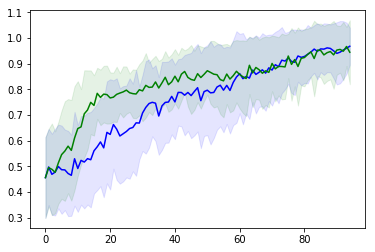

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

path = './result_PESSL'
res = []

for f in os.listdir(path):
    filepath = os.path.join(path, f)
    
    if os.path.isfile(filepath):
        temp = np.load(filepath)
        res.append(temp[()]['S'])
    
mean = np.average(res, axis = 0)
var = np.var(res, axis = 0)

x = range(len(mean))

plt.plot(x, mean[:, 0], 'b')
plt.plot(x, mean[:, 1], 'g')
plt.fill_between(x, mean[:, 0] - np.sqrt(var[:, 0]), mean[:, 0] + np.sqrt(var[:, 0]), color = 'b', alpha = 0.1)
plt.fill_between(x, mean[:, 1] - np.sqrt(var[:, 1]), mean[:, 1] + np.sqrt(var[:, 1]), color = 'g', alpha = 0.1)
plt.show()

In [ ]:
runs = 40
init_N = 10
num_Iter = 100
D = 10

for i in xrange(runs):
    fun = functions.sinc_simple10()
    R = PESSL(fun, 1, init_N, 100)
    R_random = PESSL(fun, 1, init_N, 100)
    R_random.data = copy.deepcopy(R.data)
    R_random.fitted_params = copy.deepcopy(R.fitted_params)
    R_random.xlist = copy.deepcopy(R.xlist)
    
    score = []
    mes = (lambda x, y : cos_vec(x, y))
    
    for j in xrange(num_Iter - init_N):
        vtrue = fun.W
            
        v1 = R.fitted_params['mu']
        v2 = R_random.fitted_params['mu']
        
        print 'RUN : ' + str(i + 1) + ' ' + 'ITER : ' + str(j + 1) + ' PESSL : ' + str(mes(vtrue, v1)) + ' RANDOM : ' + str(mes(vtrue, v2))
        
        R.iterate(100)
        R_random.iterate_random()
        
        score.append([mes(vtrue, v1) ,mes(vtrue, v2)])
    
    R.session.close()
    R_random.session.close()
    
    result = {'W' : vtrue,
              'X' : R.data['X'],
              'Y' : R.data['y'],
              'XR' : R_random.data['X'],
              'YR' : R_random.data['y'],
              'S' : np.array(score)}
    
    file_path = "./result_PESSL/sinc10D_" + str(i)
    
    directory = os.path.dirname(file_path)

    if not os.path.exists(directory):
        os.makedirs(directory)

    np.save(file_path, result)

RUN : 1 ITER : 1 PESSL : 0.373018238035 RANDOM : 0.373018238035
RUN : 1 ITER : 2 PESSL : 0.307138917154 RANDOM : 0.384057067014
RUN : 1 ITER : 3 PESSL : 0.431976355027 RANDOM : 0.00646225215811
RUN : 1 ITER : 4 PESSL : 0.624558030737 RANDOM : 0.140548807497
RUN : 1 ITER : 5 PESSL : 0.147771793941 RANDOM : 0.105843715626
RUN : 1 ITER : 6 PESSL : 0.0573739232951 RANDOM : 0.061580184732
RUN : 1 ITER : 7 PESSL : 0.398543042667 RANDOM : 0.0455198602129
RUN : 1 ITER : 8 PESSL : 0.108046173456 RANDOM : 0.024482182011
RUN : 1 ITER : 9 PESSL : 0.0829847779457 RANDOM : 0.119100619445
RUN : 1 ITER : 10 PESSL : 0.0689784566961 RANDOM : 0.477821009204
RUN : 1 ITER : 11 PESSL : 0.146142483633 RANDOM : 0.475199267604
RUN : 1 ITER : 12 PESSL : 0.0145837038897 RANDOM : 0.453674318978
RUN : 1 ITER : 13 PESSL : 0.142448214943 RANDOM : 0.530092714358
RUN : 1 ITER : 14 PESSL : 0.119538609 RANDOM : 0.513048117755
RUN : 1 ITER : 15 PESSL : 0.136501721344 RANDOM : 0.491197778948
RUN : 1 ITER : 16 PESSL : 0.39

RUN : 2 ITER : 36 PESSL : 0.419174843188 RANDOM : 0.590660381687
RUN : 2 ITER : 37 PESSL : 0.366029840998 RANDOM : 0.625578033635
RUN : 2 ITER : 38 PESSL : 0.0272851988268 RANDOM : 0.54708985747
RUN : 2 ITER : 39 PESSL : 0.399659740341 RANDOM : 0.376303133686
RUN : 2 ITER : 40 PESSL : 0.266789366247 RANDOM : 0.660112782474
RUN : 2 ITER : 41 PESSL : 0.333647112556 RANDOM : 0.658757132523
RUN : 2 ITER : 42 PESSL : 0.186611735884 RANDOM : 0.699323818041
RUN : 2 ITER : 43 PESSL : 0.277393365972 RANDOM : 0.703329814214
RUN : 2 ITER : 44 PESSL : 0.0375436914316 RANDOM : 0.676700795885
RUN : 2 ITER : 45 PESSL : 0.166736378262 RANDOM : 0.673784590688
RUN : 2 ITER : 46 PESSL : 0.271591790288 RANDOM : 0.684971248649
RUN : 2 ITER : 47 PESSL : 0.277745553377 RANDOM : 0.715613297347
RUN : 2 ITER : 48 PESSL : 0.0248007456265 RANDOM : 0.706957823452
RUN : 2 ITER : 49 PESSL : 0.295701735056 RANDOM : 0.655800039022
RUN : 2 ITER : 50 PESSL : 0.296984522333 RANDOM : 0.584600221442
RUN : 2 ITER : 51 PESSL

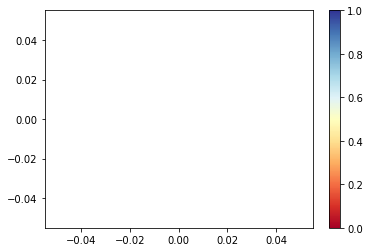

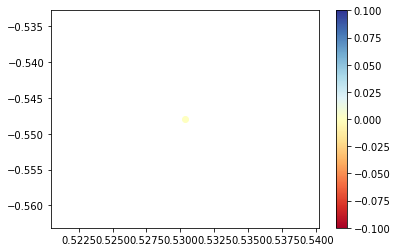

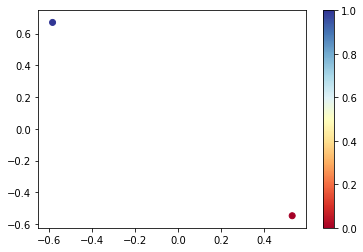

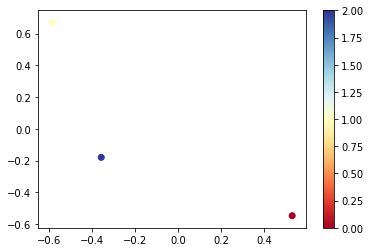

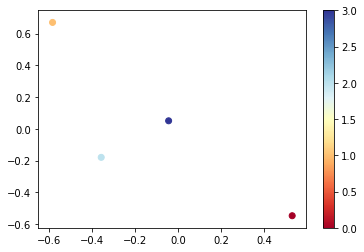

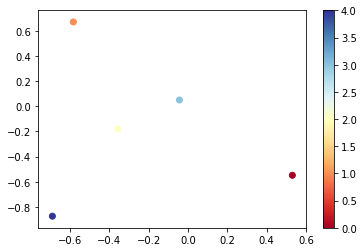

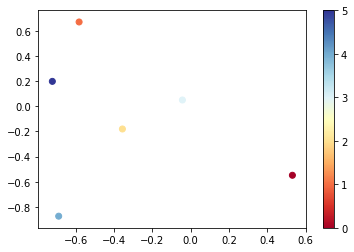

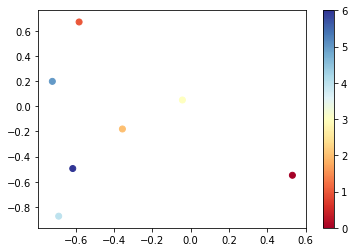

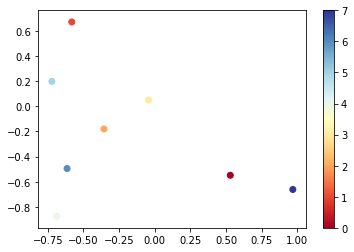

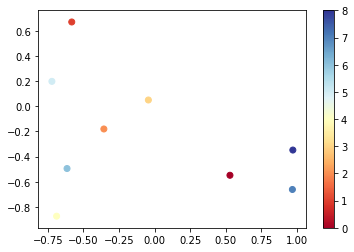

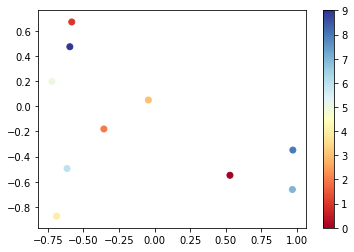

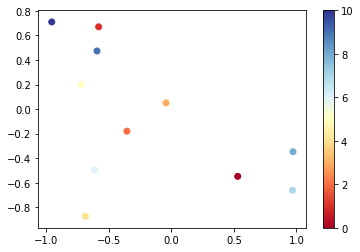

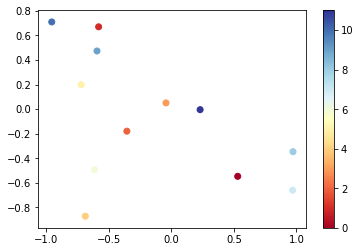

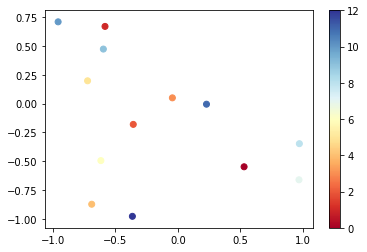

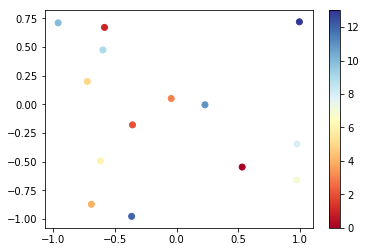

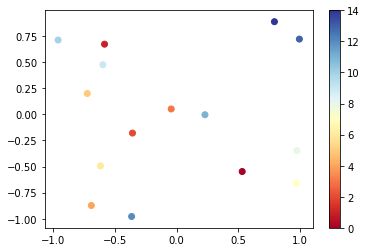

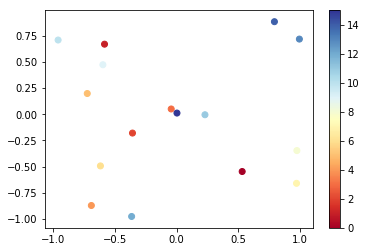

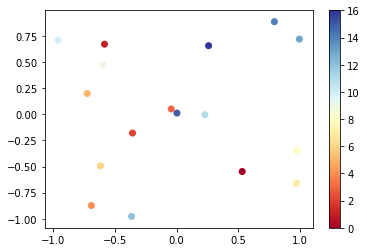

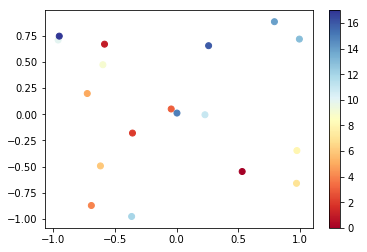

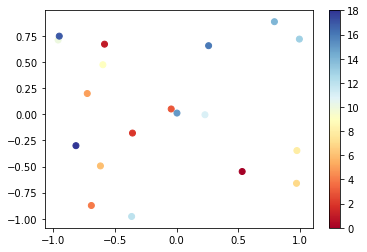

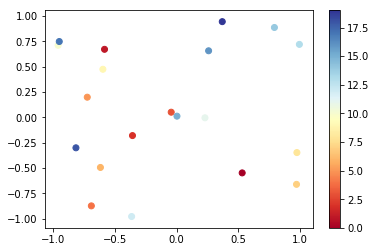

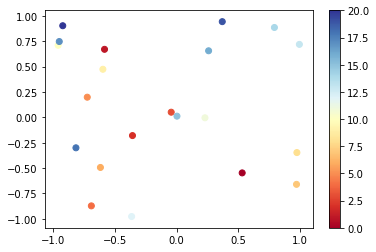

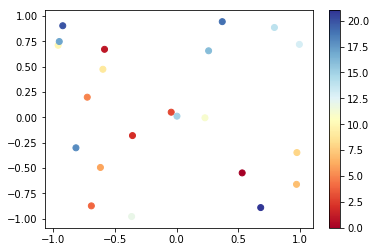

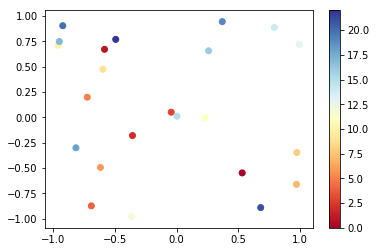

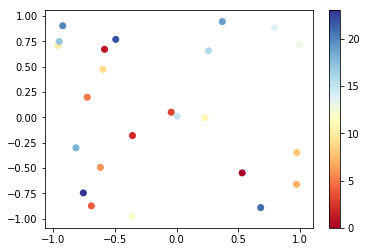

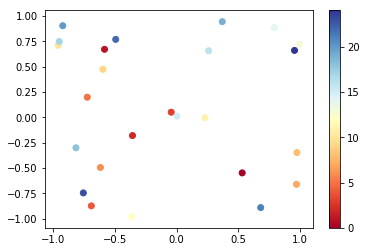

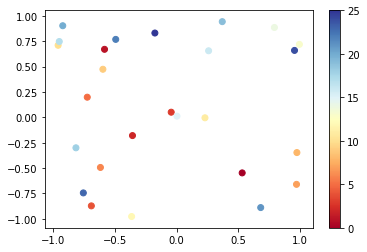

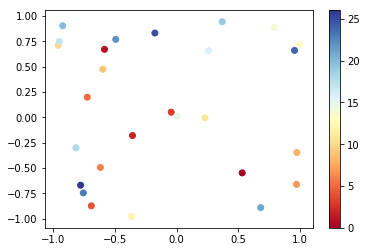

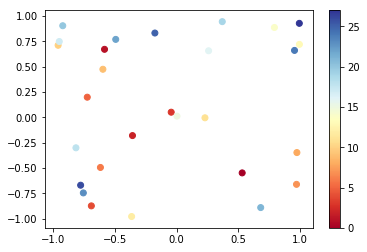

In [23]:
import os
import numpy as np
import matplotlib.pyplot as plt

for n in xrange(29):
    x = range(len(R.data['X'][:n, 0]))
    cm = plt.cm.get_cmap('RdYlBu')
    sc = plt.scatter(R.data['X'][:n, 0], R.data['X'][:n, 1], c = x, cmap = cm)
    plt.colorbar(sc)
    plt.show()

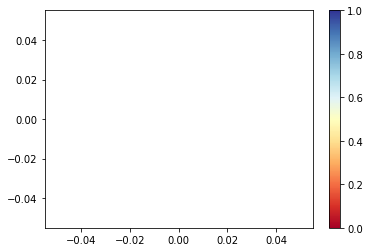

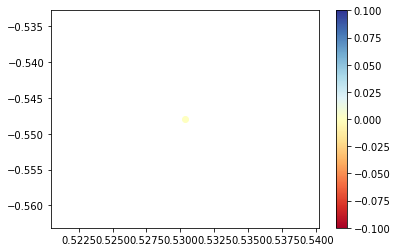

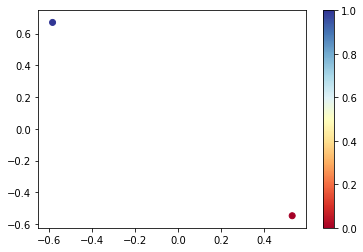

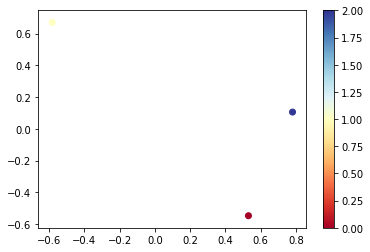

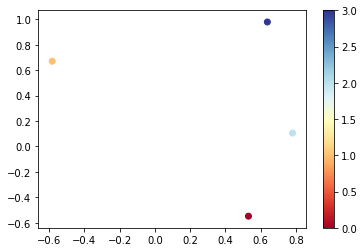

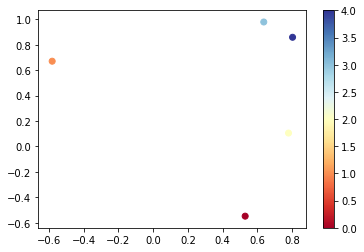

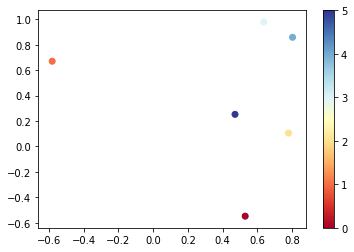

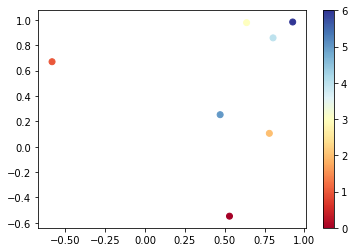

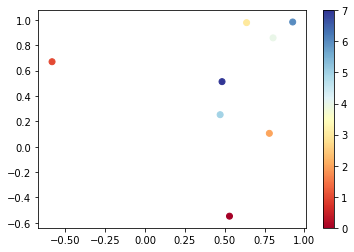

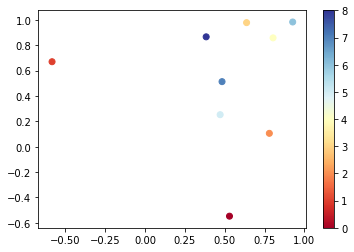

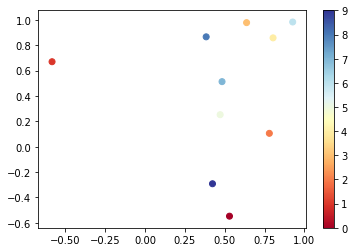

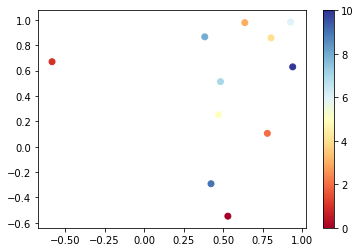

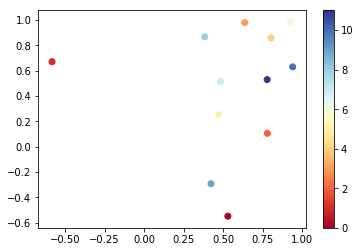

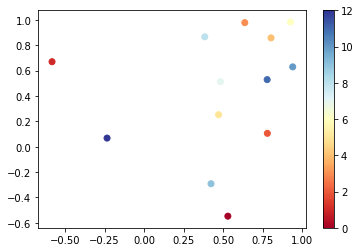

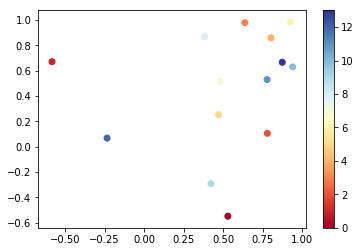

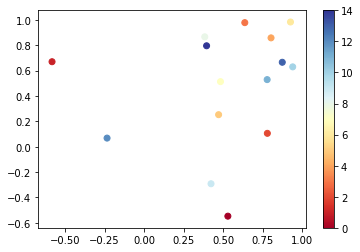

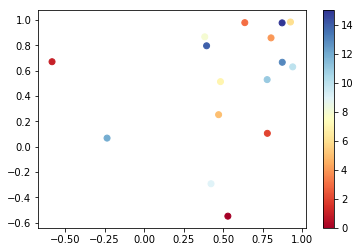

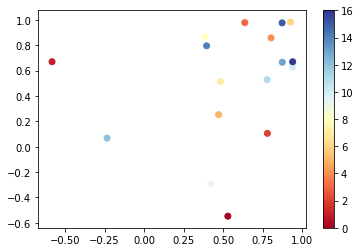

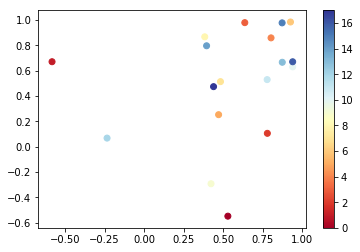

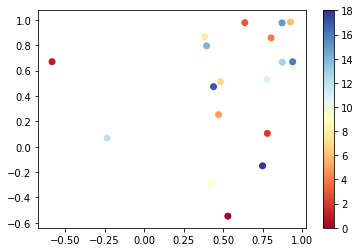

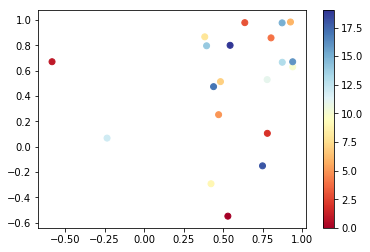

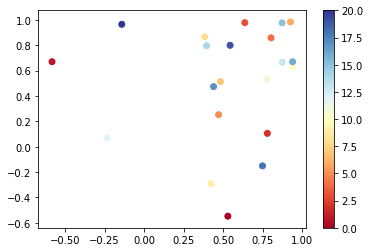

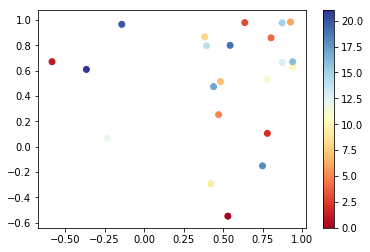

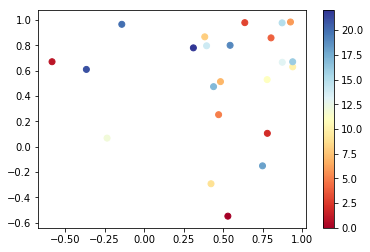

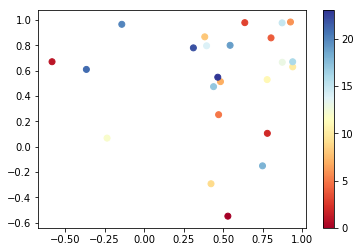

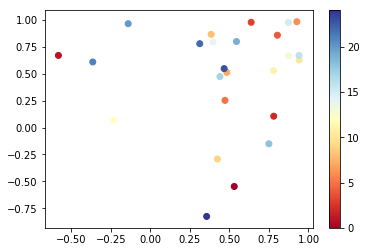

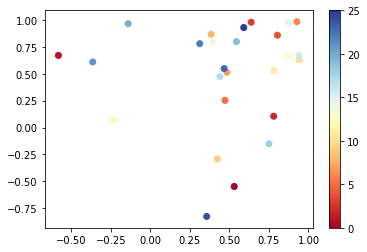

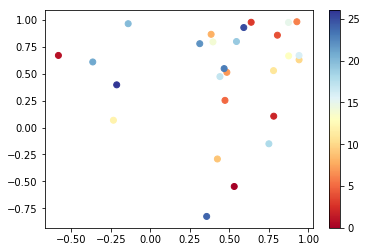

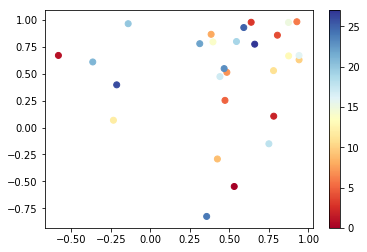

In [24]:
for n in xrange(29):
    x = range(len(R_random.data['X'][:n, 0]))
    cm = plt.cm.get_cmap('RdYlBu')
    sc = plt.scatter(R_random.data['X'][:n, 0], R_random.data['X'][:n, 1], c = x, cmap = cm)
    plt.colorbar(sc)
    plt.show()

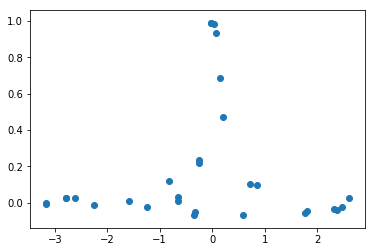

In [25]:
plt.scatter(np.matmul(R.data['X'], R.fun.W), R.data['y'])
plt.show()

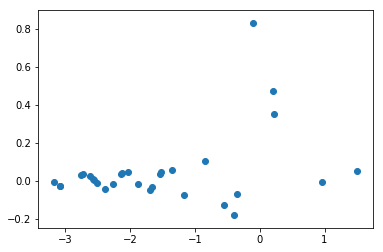

In [26]:
plt.scatter(np.matmul(R_random.data['X'], R_random.fun.W), R_random.data['y'])
plt.show()

1.0
